In [27]:
import pandas as pd
import numpy as np
def get_statistics_data(data_type):
    path=f'{data_type}_Summary.xlsx'
    data=pd.read_excel(path)
    pd.set_option('future.no_silent_downcasting', True)
    data.replace('/', np.nan, inplace=True)
    data.describe().to_csv(f'data/new_data/{data_type}_statistic.csv',encoding='utf-8-sig')
    print(data['Fasting Plasma Glucose (mg/dl)'][data['Fasting Plasma Glucose (mg/dl)']!='/'].describe())
    print(data['2-hour Postprandial Plasma Glucose (mg/dl)'][data['2-hour Postprandial Plasma Glucose (mg/dl)']!='/'].describe())
    print(data['HbA1c (mmol/mol)'][data['HbA1c (mmol/mol)']!='/'].describe())
get_statistics_data('Shanghai_T1DM')
get_statistics_data('Shanghai_T2DM')

count     16.000000
mean     193.230000
std       86.486582
min       80.280000
25%      117.000000
50%      181.800000
75%      252.225000
max      352.800000
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count      14.00
unique     13.00
top       258.84
freq        2.00
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count     15.000
unique    12.000
top       69.405
freq       2.000
Name: HbA1c (mmol/mol), dtype: float64
count     106.0
unique     74.0
top       167.4
freq        7.0
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count      87.0
unique     84.0
top       315.9
freq        2.0
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count     101.000
unique     57.000
top        59.568
freq        6.000
Name: HbA1c (mmol/mol), dtype: float64


In [22]:
data_type='Shanghai_T2DM'
path=f'{data_type}_Summary.xlsx'
data=pd.read_excel(path)
data.describe().to_csv(f'data/new_data/{data_type}_statistic.csv',encoding='utf-8-sig')
print(pd.to_numeric(data['Fasting Plasma Glucose (mg/dl)'][data['Fasting Plasma Glucose (mg/dl)']!='/']).describe())
print(pd.to_numeric(data['2-hour Postprandial Plasma Glucose (mg/dl)'][data['2-hour Postprandial Plasma Glucose (mg/dl)']!='/']).describe())
print(pd.to_numeric(data['HbA1c (mmol/mol)'][data['HbA1c (mmol/mol)']!='/']).describe())

count    106.000000
mean     164.871509
std       62.750678
min       55.800000
25%      126.000000
50%      158.400000
75%      186.300000
max      432.000000
Name: Fasting Plasma Glucose (mg/dl), dtype: float64
count     87.000000
mean     264.757241
std       96.037434
min       97.020000
25%      195.390000
50%      250.200000
75%      315.900000
max      610.380000
Name: 2-hour Postprandial Plasma Glucose (mg/dl), dtype: float64
count    101.000000
mean      74.653564
std       26.565081
min       23.499000
25%       53.010000
50%       67.219000
75%       94.544000
max      144.822000
Name: HbA1c (mmol/mol), dtype: float64


[]
0


D:\Temp\ipykernel_19220\2561019030.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0,max(n)+max(n)/10)


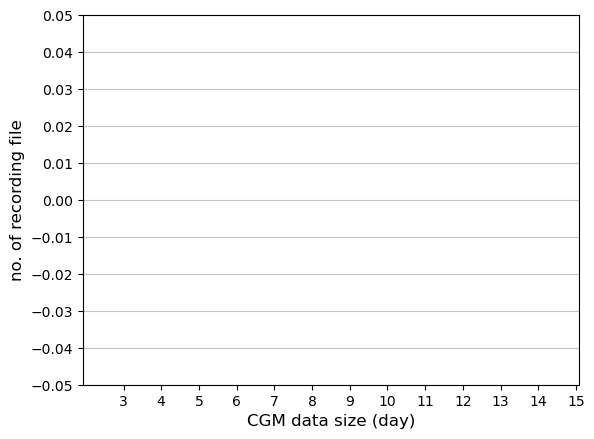

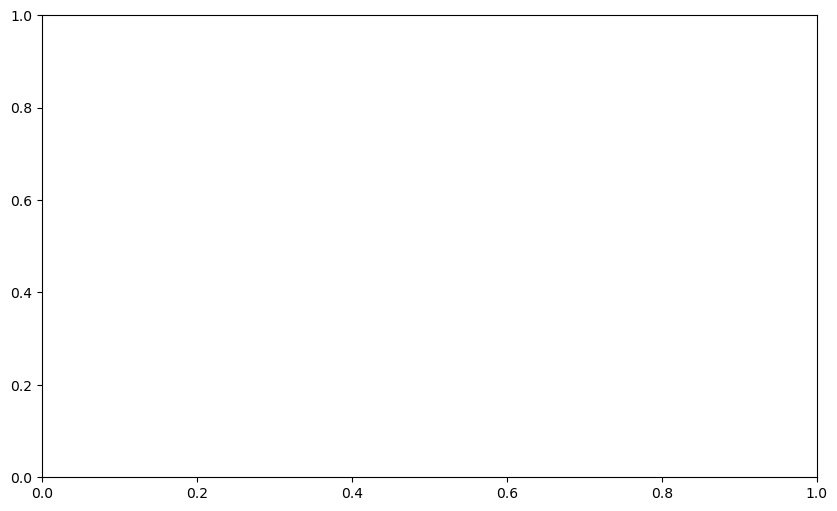

[]
0


D:\Temp\ipykernel_19220\2561019030.py:26: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0,max(n)+max(n)/10)


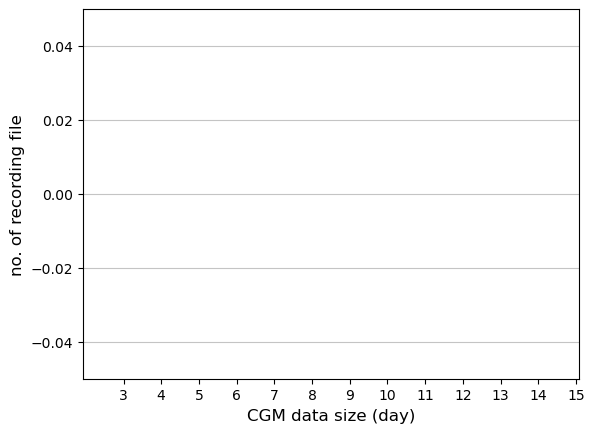

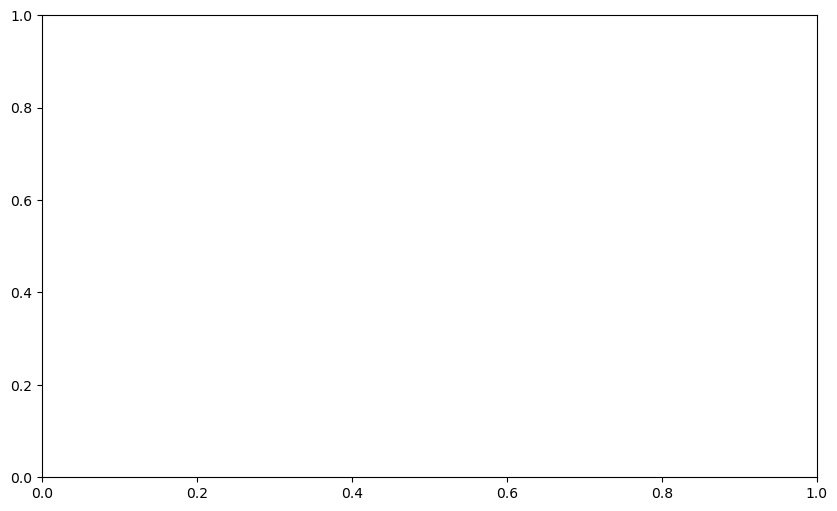

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
from matplotlib.ticker import MaxNLocator

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

def get_cgm_fig(diabetes_type):
    data_path=f'data/new_data/{diabetes_type}'
    patient_len_list=[]
    for file in os.listdir(data_path):
        data=pd.read_excel(f'{data_path}/{file}')
        patient_len_list.append(math.ceil(len(data['CGM (mg / dl)'].dropna())/96))
    print(patient_len_list)
    print(sum(patient_len_list))
    n, bins, patches=plt.hist(patient_len_list,bins=np.arange(3,16),rwidth=0.96,align='left')
    # n, bins, patches=plt.hist(patient_len_list,rwidth=0.96,align='left')
    for i in range(len(n)):
        if n[i]!=0:
            plt.text(bins[i], n[i]+max(n)/40, int(n[i]), fontsize=12, horizontalalignment="center") #打标签，在合适的位置标注每个直方图上面样本数

    plt.grid(axis= 'y', alpha= 0.75)
    plt.ylabel('no. of recording file',fontsize = 12)
    plt.ylim(0,max(n)+max(n)/10)

    plt.xlabel('CGM data size (day)',fontsize = 12)
    plt.xticks(range(3,16),range(3,16))
    # plt.title('Frequency of patients sample size in Shanghai_T2DM')
    # plt.subplots_adjust(top=1,bottom=0,left=0,right=1,hspace=0,wspace=0) 
    # plt.margins(0,0)
    # figsize=(10,6),
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.savefig(f'frequency_{diabetes_type}.jpg', dpi=200, bbox_inches='tight')
    plt.show()
    
get_cgm_fig('Shanghai_T1DM')
get_cgm_fig('Shanghai_T2DM')

Shanghai_T1DM/1001_0_20210730.xlsx
Shanghai_T1DM/1002_0_20210504.xlsx
Shanghai_T1DM/1002_1_20210521.xlsx
Shanghai_T1DM/1002_2_20210909.xlsx
Shanghai_T1DM/1003_0_20210831.xlsx
Shanghai_T1DM/1004_0_20210425.xlsx
Shanghai_T1DM/1005_0_20210522.xlsx
Shanghai_T1DM/1006_0_20210114.xlsx
Shanghai_T1DM/1006_1_20210209.xlsx
Shanghai_T1DM/1006_2_20210303.xlsx
Shanghai_T1DM/1007_0_20210726.xlsx
Shanghai_T1DM/1008_0_20210713.xlsx
Shanghai_T1DM/1009_0_20210803.xlsx
Shanghai_T1DM/1010_0_20210915.xlsx
Shanghai_T1DM/1011_0_20210622.xlsx
Shanghai_T1DM/1012_0_20210923.xlsx
TAR: 37.763855988896154 18.833395777513637
TIR: 54.73290374672831 14.540733403335738
TBR: 7.50324026437554 7.003103224737889


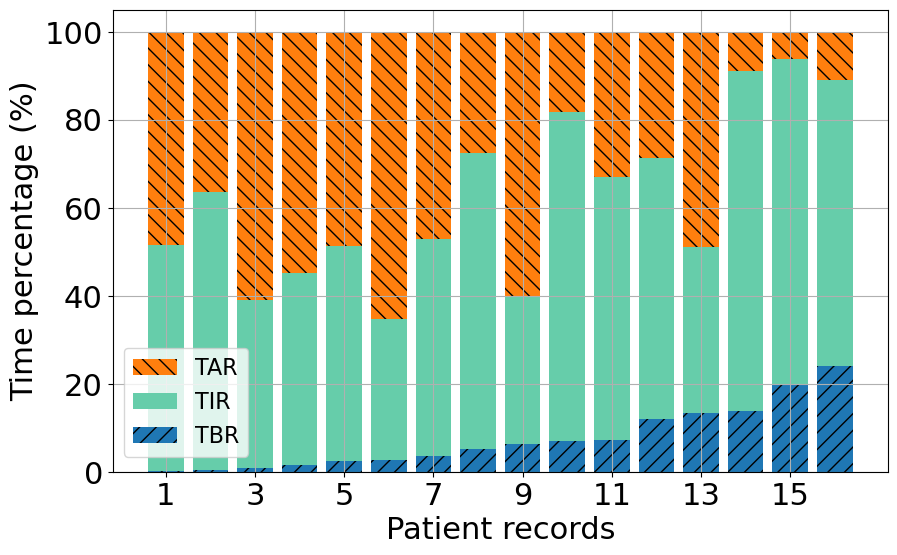

Shanghai_T2DM/2000_0_20201230.xlsx
Shanghai_T2DM/2001_0_20201102.xlsx
Shanghai_T2DM/2001_1_20201117.xlsx
Shanghai_T2DM/2002_0_20210513.xlsx
Shanghai_T2DM/2003_0_20210615.xlsx
Shanghai_T2DM/2004_0_20211028.xlsx
Shanghai_T2DM/2005_0_20211201.xlsx
Shanghai_T2DM/2006_0_20211112.xlsx
Shanghai_T2DM/2007_0_20220108.xlsx
Shanghai_T2DM/2008_0_20220118.xlsx
Shanghai_T2DM/2009_0_20211103.xlsx
Shanghai_T2DM/2010_0_20220111.xlsx
Shanghai_T2DM/2011_0_20220123.xlsx
Shanghai_T2DM/2012_0_20220126.xlsx
Shanghai_T2DM/2013_0_20220123.xlsx
Shanghai_T2DM/2014_0_20201224.xlsx
Shanghai_T2DM/2014_1_20210317.xlsx
Shanghai_T2DM/2015_0_20210203.xlsx
Shanghai_T2DM/2015_1_20210219.xlsx
Shanghai_T2DM/2016_0_20201224.xlsx
Shanghai_T2DM/2017_0_20210102.xlsx
Shanghai_T2DM/2017_1_20201118.xlsx
Shanghai_T2DM/2018_0_20210420.xlsx
Shanghai_T2DM/2019_0_20210513.xlsx
Shanghai_T2DM/2020_0_20210423.xlsx
Shanghai_T2DM/2021_0_20211013.xlsx
Shanghai_T2DM/2022_0_20210419.xlsx
Shanghai_T2DM/2023_0_20210812.xlsx
Shanghai_T2DM/2024_0

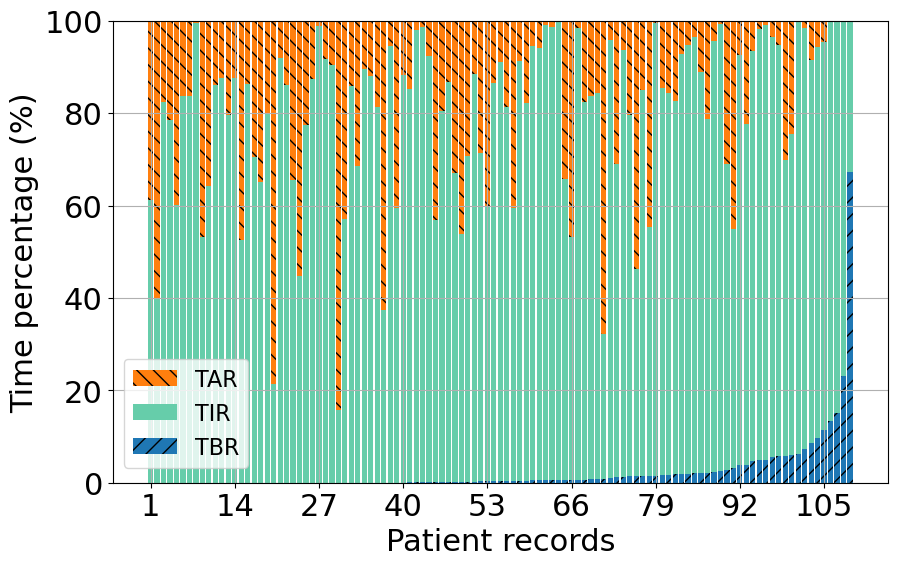

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
if not os.path.exists('bg_precentage'):
    os.mkdir('bg_precentage')
    
def bg_percentage(diabetes_type):
    data_path=f'{diabetes_type}'
    low_res=[]
    high_res=[]
    lower_bound=70
    higher_bound=180
    fontsize=22
    for file in os.listdir(data_path):
        if file == '.DS_Store':
            continue
        print(f'{data_path}/{file}')
        data=pd.read_excel(f'{data_path}/{file}',engine='openpyxl')
        data=data['CGM (mg / dl)'].dropna()
        low_res.append(len(data[data<lower_bound])/len(data)*100)
        high_res.append(len(data[data>higher_bound])/len(data)*100)
        
    index=sorted(enumerate(low_res), key=lambda x:x[1])
    index=[x[0] for x in index]
    low_res=np.array(low_res)[index]
    high_res=np.array(high_res)[index]
    normal_res=[100-low_res[i]-high_res[i] for i in range(len(high_res))]
    high_bottom=[low_res[i]+normal_res[i] for i in range(len(high_res))]
    print("TAR:",np.mean(high_res),np.std(high_res))
    print("TIR:",np.mean(normal_res),np.std(normal_res))
    print("TBR:",np.mean(low_res),np.std(low_res))

    x=np.arange(1,len(low_res)+1)
    fig=plt.figure(figsize=(10,6))
    ax1=fig.add_subplot(111)
    
    plt.bar(x,high_res,bottom=high_bottom,label='TAR',hatch='\\\\',color='#ff7f0e')
    plt.bar(x,normal_res,bottom=low_res,label='TIR',color='#66CDAA')
    plt.bar(x,low_res,label='TBR',hatch='//',color='#1f77b4')
    
    ax1.set_ylabel("Time percentage (%)",fontsize=fontsize)
    plt.xlabel(f'Patient records',fontsize=fontsize)
    my_x_ticks = np.arange(1,len(low_res)+1,(len(low_res)+1)//8)
    plt.xticks(my_x_ticks)
    plt.legend(fontsize=16,loc='center left',bbox_to_anchor=(0,0.15))
    plt.tick_params(labelsize=fontsize)
    plt.grid()
    plt.savefig(f'bg_precentage/{diabetes_type}_sorted.png',dpi=200,bbox_inches='tight')
    plt.show()
    
bg_percentage('Shanghai_T1DM')
bg_percentage('Shanghai_T2DM')

In [48]:
# import numpy as np
# import joblib,os
# import matplotlib.pyplot as plt
# import pandas as pd
def plot_acf(data,time_interval=15,length=650,patient=''):
    y = data
    x = np.arange(length)
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    # # use only second half
    acor = acor[int(len(acor)/2):]
    acor=acor[x]

    x=[i/60*time_interval for i in x]
    # plt.xlim(-10,300)
    plt.plot(x,acor,label=patient)

def get_acf(data):
    y = data
#     x = np.arange(length)
    yunbiased = y-np.mean(y)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    # # use only second half
    acor = acor[int(len(acor)/2):]
    return acor

def get_acf(diabetes_type):
    path=f'{diabetes_type}'
    for patient in os.listdir(path):
        fig = plt.figure(figsize = (10,6),dpi=200)
        data_path=f'{path}/{patient}'
        data=pd.read_excel(data_path)
        data=data['CGM (mg / dl)'].dropna()
        print(patient)
        patient='_'.join(patient.split('_')[0:2])
        min_len=500
        if len(data)<2*min_len:
            plot_acf(data,time_interval=15,length=len(data)//2,patient=patient)    
        else:
            plot_acf(data,time_interval=15,length=min_len,patient=patient)    
        plt.xlabel('Time Lag (hour)', fontsize=18)
        plt.ylabel('Auto-correlation coefficient', fontsize=18)
        plt.tick_params(axis='both',labelsize =18)
        plt.title(f"{patient}",fontsize=18)
        plt.savefig(f"acf/{diabetes_type}/{patient}.jpg",dpi=200,bbox_inches='tight')
        plt.show()
        
if not os.path.exists('acf'):
    os.mkdir('acf')
    
# get_acf('Shanghai_T1DM')
# get_acf('Shanghai_T2DM')

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 53)

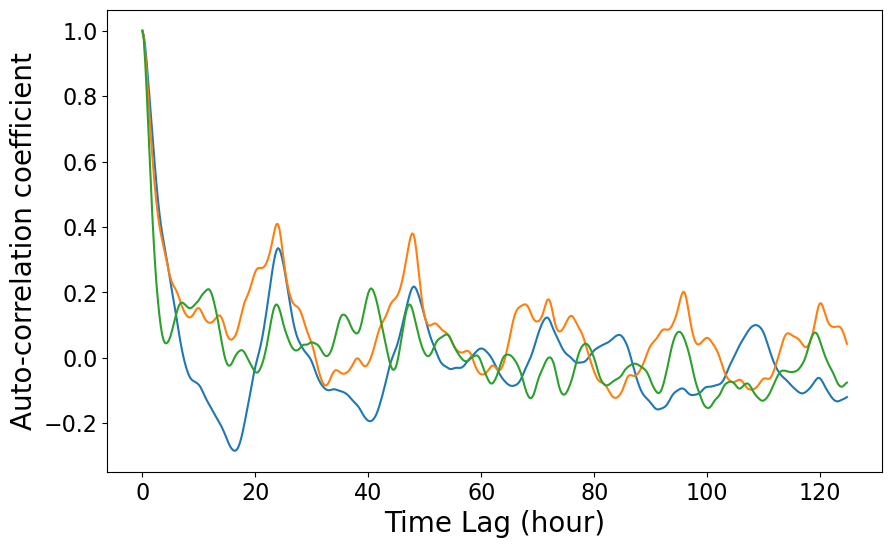

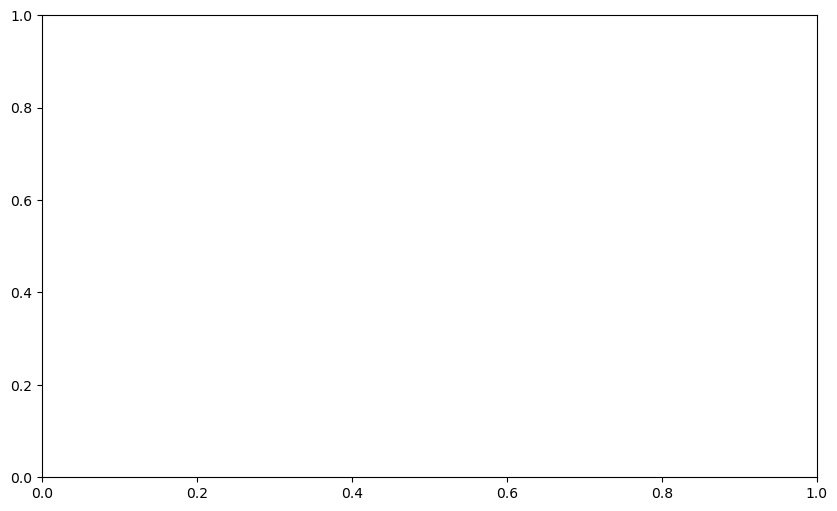

In [51]:
diabetes_type='Shanghai_T1DM'      
min_len=500
fig=plt.figure(figsize=(10,6))

plot_acf(pd.read_excel(f'{diabetes_type}/1005_0_20210522.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{diabetes_type}/1003_0_20210831.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{diabetes_type}/1007_0_20210726.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plt.xlabel('Time Lag (hour)', fontsize=20)
plt.ylabel('Auto-correlation coefficient', fontsize=20)
plt.tick_params(axis='both',labelsize =16)
# plt.title(f"{patient}",fontsize=18)
fig, ax = plt.subplots(figsize=(10, 6))
plt.savefig(f"acf/{diabetes_type}_acf.jpg",dpi=200,bbox_inches='tight')
plt.show()

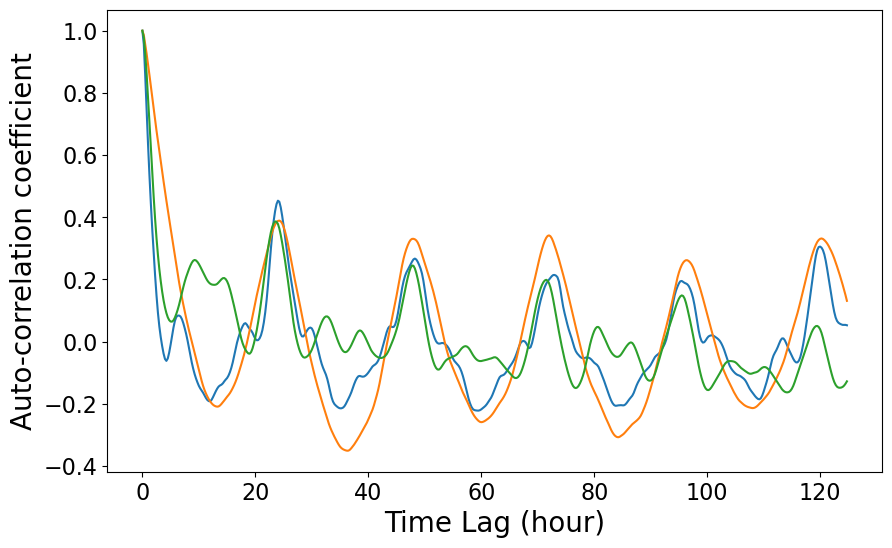

In [55]:
diabetes_type='Shanghai_T2DM'      
min_len=500
fig=plt.figure(figsize=(10,6))

plot_acf(pd.read_excel(f'{diabetes_type}/2016_0_20201224.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{diabetes_type}/2017_0_20210102.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plot_acf(pd.read_excel(f'{diabetes_type}/2018_0_20210420.xlsx')['CGM (mg / dl)'].dropna(),time_interval=15,length=min_len)    
plt.xlabel('Time Lag (hour)', fontsize=20)
plt.ylabel('Auto-correlation coefficient', fontsize=20)
plt.tick_params(axis='both',labelsize =16)
# plt.title(f"{patient}",fontsize=18)
#plt.subplot(figsize=(10,6))
plt.savefig(f"acf/{diabetes_type}_acf.jpg",dpi=200,bbox_inches='tight')
plt.show()

In [64]:
# Statistics of CGM data and finger blood
# import pandas as pd
# import datetime
# import matplotlib.pyplot as plt
# import os
import matplotlib.dates as mdates
diabetes_type='Shanghai_T2DM'
def get_cgm_cbg(diabetes_type):
    data_path=f'{diabetes_type}'
    for file in os.listdir(data_path):
        print(file)
        data=pd.read_excel(f'{data_path}/{file}')
        data=data.dropna(subset=['CGM (mg / dl)'])
        data['time']=pd.to_datetime(data['Date'])
        new_data=data[data['CBG (mg / dl)'].notnull()].reset_index()
        if data[data['CBG (mg / dl)'].notnull()].empty:
            continue
        new_data.index=new_data['time']
        plt.figure(figsize=(10,5),dpi=200)
        plt.plot(new_data['CGM (mg / dl)'],label='CGM',color='blue',marker='D',markersize=4)
        plt.plot(new_data['CBG (mg / dl)'],color='g',marker='o',markersize=4,label='CBG')
        # plt.plot(new_data['Glucose Meter reading'],color='r',marker='+',markersize=4,label='Glucose Meter reading')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        plt.legend(fontsize=16)
        plt.xlabel('Date',fontsize=20)
        plt.ylabel('Blood glucose (mg/dl)',fontsize=20)
        # plt.title(f'{file}')
        #fig=plt.figure(figsize=(10,6))
        plt.tick_params(axis='both',labelsize =16)
        plt.savefig(f'different_measure/{diabetes_type}/{file}.jpg',dpi=200,bbox_inches='tight')
        plt.close()

if not os.path.exists('different_measure'):
    os.mkdir('different_measure')
    
get_cgm_cbg('Shanghai_T1DM')
get_cgm_cbg('Shanghai_T2DM')

1001_0_20210730.xlsx
1002_0_20210504.xlsx
1002_1_20210521.xlsx
1002_2_20210909.xlsx
1003_0_20210831.xlsx
1004_0_20210425.xlsx
1005_0_20210522.xlsx
1006_0_20210114.xlsx
1006_1_20210209.xlsx
1006_2_20210303.xlsx
1007_0_20210726.xlsx
1008_0_20210713.xlsx
1009_0_20210803.xlsx
1010_0_20210915.xlsx
1011_0_20210622.xlsx
1012_0_20210923.xlsx
2000_0_20201230.xlsx
2001_0_20201102.xlsx
2001_1_20201117.xlsx
2002_0_20210513.xlsx
2003_0_20210615.xlsx
2004_0_20211028.xlsx
2005_0_20211201.xlsx
2006_0_20211112.xlsx
2007_0_20220108.xlsx
2008_0_20220118.xlsx
2009_0_20211103.xlsx
2010_0_20220111.xlsx
2011_0_20220123.xlsx
2012_0_20220126.xlsx
2013_0_20220123.xlsx
2014_0_20201224.xlsx
2014_1_20210317.xlsx
2015_0_20210203.xlsx
2015_1_20210219.xlsx
2016_0_20201224.xlsx
2017_0_20210102.xlsx
2017_1_20201118.xlsx
2018_0_20210420.xlsx
2019_0_20210513.xlsx
2020_0_20210423.xlsx
2021_0_20211013.xlsx
2022_0_20210419.xlsx
2023_0_20210812.xlsx
2024_0_20210429.xlsx
2025_0_20210506.xlsx
2026_0_20210916.xlsx
2027_0_202105